<a href="https://colab.research.google.com/github/bharath21eeb0b40/dbms/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Text(0.5, 1.0, 'Class 5')

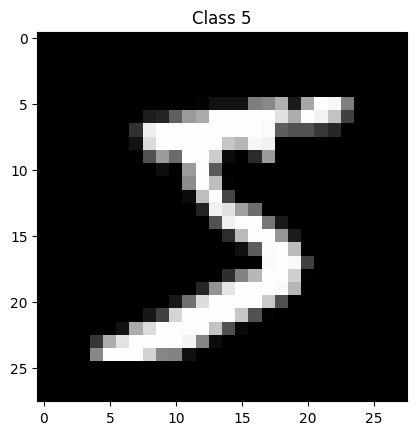

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [ ]:
features_train=X_train.reshape(X_train.shape[0],28,28,1)
features_test=X_test.reshape(X_test.shape[0],28,28,1)

In [ ]:
features_train=features_train.astype('float32')/255
features_test=features_test.astype('float32')/255

In [ ]:
!pip install tensorflow
from tensorflow.keras.utils import to_categorical # Import to_categorical directly from tensorflow.keras.utils
targets_train = to_categorical(y_train, 10) # Use to_categorical instead of np_utils.to_categorical
targets_test = to_categorical(y_test, 10) # Use to_categorical instead of np_utils.to_categorical

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Flatten, Dense, Dropout # Import Activation, Flatten, Dense, and Dropout
from keras.models import Sequential
#from keras.layers.normalization import BatchNormalization # This line is no longer needed
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
#... rest of your code ...
model.add(Activation('relu')) # Now Activation is defined and can be used
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#flattening layer
model.add(Flatten()) # Now Flatten is defined and can be used
# Fully connected layer
model.add(BatchNormalization())
model.add(Dense(512)) # Now Dense is defined and can be used
model.add(Activation('relu'))
model.add(BatchNormalization())
#regularization helps to avoid overfitting
model.add(Dropout(0.3)) # Now Dropout is defined and can be used
model.add(Dense(10,activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rotation_range=7, width_shift_range=0.05, shear_range=0.2,
                         height_shift_range=0.07, zoom_range=0.05)

In [ ]:
test_genrator = ImageDataGenerator()

train_generator = train_generator.flow(features_train, targets_train, batch_size=64)
test_generator = test_genrator.flow(features_test, targets_test, batch_size=64)

In [ ]:
model.fit(train_generator, steps_per_epoch=60000//64, epochs=5,
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 0.9262 - loss: 0.2454 - val_accuracy: 0.9872 - val_loss: 0.0413
Epoch 2/5
  1/937 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 1.0000 - loss: 0.0101

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 1.0000 - loss: 0.0101 - val_accuracy: 1.0000 - val_loss: 5.7486e-04
Epoch 3/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9811 - loss: 0.0599 - val_accuracy: 0.9916 - val_loss: 0.0257
Epoch 4/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - accuracy: 1.0000 - loss: 0.0086 - val_accuracy: 1.0000 - val_loss: 3.5922e-04
Epoch 5/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9860 - loss: 0.0440 - val_accuracy: 0.9933 - val_loss: 0.0223
